<a href="https://colab.research.google.com/github/BYFarag/Homelessness/blob/main/Bayan_Farag_DATA_3320_Homelessness_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

##### The objective of this project is to investigate homelessness in the US. Our project is motivated by the goals of the HUD study:

“To continue progressing toward the goals of ending and preventing homelessness, we must further our knowledge of the basic community-level determinants of homelessness. The primary objectives of this study are to (1) identify market factors that have established effects on homelessness, (2) construct and evaluate empirical models of community-level homelessness..”

We will investigate whether there are alternative modeling approaches that outperform the models described in the HUD report.

## **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Train-test splits and cross validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Model preprocessing
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import RobustScaler

import plotly.offline as pyo
import plotly.graph_objs as go

import itertools
from itertools import combinations
from math import comb

from os import name

from scipy.stats import uniform, randint
import xgboost as xgb

# Model metrics and analysis
from sklearn.metrics import  mean_squared_error, mean_absolute_error

# plot tree model
import graphviz

## **Load clean data**

##### $\rightarrow$ Load the clean data set from Github. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BYFarag/Homelessness/main/df%20(4).csv')

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
df.head()

,year,coc_number,rural,suburban,city_or_urban,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,...,rate_homeless,rate_sheltered,rate_unsheltered,percent_black,percent_latino_hispanic,percent_asian,percent_pacific_islander,percent_population_0_19,percent_population_65_plus,percent_female_population
0,2017,AK-500,0,0,1,1128.0,973.0,155.0,297376,11.743647,...,37.931777,32.719520,5.212257,0.053811,0.089967,0.093952,0.024387,0.269161,0.099140,0.489629
1,2017,AK-501,1,0,0,717.0,578.0,139.0,444146,9.042710,...,16.143340,13.013739,3.129602,0.019530,0.055727,0.040104,0.004593,0.278562,0.109905,0.467752
2,2017,AL-500,0,1,0,1092.0,875.0,217.0,958302,-0.852477,...,11.395155,9.130733,2.264422,0.331147,0.040843,0.016632,0.000311,0.256410,0.149058,0.521677
3,2017,AL-501,0,0,1,606.0,341.0,265.0,622361,-8.507004,...,9.737114,5.479135,4.257979,0.266807,0.033816,0.016889,0.000382,0.254735,0.167126,0.519669
4,2017,AL-502,1,0,0,155.0,133.0,22.0,265264,0.751167,...,5.843235,5.013873,0.829362,0.090348,0.042056,0.004901,0.000471,0.236545,0.190708,0.513937


In [ ]:
df.columns

Index(['year', 'coc_number', 'rural', 'suburban', 'city_or_urban',
       'total_homeless', 'total_sheltered', 'total_unsheltered',
       'total_population', 'house_price_index_2009', 'log_median_rent',
       'utility_costs', 'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'share_renters_2016',
       'rental_vacancy_rate', 'high_housing_density', 'number_eviction',
       'share_overcrowded_units_2016', 'city_or_urban.1', 'suburban.1',
       'rate_unemployment', 'gini_coefficient_2016', 'poverty_rate',
       'share_HUD_units', 'HUD_unit_occupancy_rate', 'share_built_before_1940',
       'total_black', 'total_latino_hispanic', 'total_asian',
       'total_pacific_islander', 'total_population_0_19',
       'total_population_65_plus', 'total_female_population', 'net_migration',
       'migration_4_year_change', 'proportion_one_person_households',
       'share_under_18_with_single_parent', 'share_veteran_status',
       'share_no_bachelors',

## **State your questions**

The overall problem is to determine whether and how housing market factors are related to homelessness. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ Some questions about the data that will help you solve the problem: 
1. Does the density of the area such as suburban, rural, major city affect thier respective homelessness rates
2. Is there a correlation between housing prices and homelessness rates? If so, is it positive or negative?
3. Are there any specific demographic groups that are more affected by housing market factors and have higher rates of homelessness?
4. What are the key housing market factors that could potentially influence homelessness rates?

## **Analysis**

This section down below goes over train test, mutiple regression models, XGBoost and plots the necessary plots & figures

In order to start our analysis we are going to drop a couple of columns

In [ ]:
removed_var = ['total_sheltered', 'total_unsheltered', 'total_black', 'total_latino_hispanic', 'total_asian', 'suburban.1', 'city_or_urban.1', 'total_pacific_islander', 'total_population_0_19', 'total_population_65_plus', 'total_female_population', 'year', 'rate_unsheltered', 'rate_sheltered']

In [ ]:
df = df.drop(columns = removed_var)

In [ ]:
X = df[df.columns.difference(['coc_number', 'total_homeless', 'rate_homeless', 'area_density', 'total_population'])]
Y = df['rate_homeless']

In [ ]:
X.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,migration_4_year_change,...,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
0,99.000000,13.800000,60.799999,1,42.010002,0,11.743647,2.438863,8.751520,-0.849202,...,0.366995,65.634148,4.117406,39.727921,23.379078,14.535126,0,1.710000,16.500000,8.500000
1,99.000000,13.800000,60.799999,0,40.675701,0,9.042710,2.249699,9.972870,-0.466562,...,2.236410,75.560379,9.294898,33.922234,19.786558,14.142518,0,1.710000,16.500000,14.607715
2,95.083710,50.995346,80.874313,0,47.633533,0,-0.852477,1.862248,9.318163,-0.000659,...,7.191579,65.983711,1.235925,31.769621,32.077599,9.149558,1,6.669876,38.593376,19.492331
3,87.000801,57.893360,81.939949,1,46.713249,0,-8.507004,1.858394,8.709522,0.208839,...,3.681716,74.543457,1.712736,32.109203,33.668129,11.647923,0,12.296666,58.519012,18.899839
4,95.178665,48.382103,79.429985,0,45.165546,0,0.751167,1.362010,8.967195,0.231822,...,5.150007,82.332657,1.539988,27.708206,27.959316,9.135015,0,5.462999,44.778618,18.803186


#### **Train Test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .15, random_state = 24)

We now are creating a correlation matrix as a heatmap, this code helps to identify the relationships and patterns between the remaining columns in the DataFrame, excluding the 'coc_number' column. The color intensity represents the strength of the correlation, where darker colors indicate a stronger positive or negative correlation.

<Axes: >

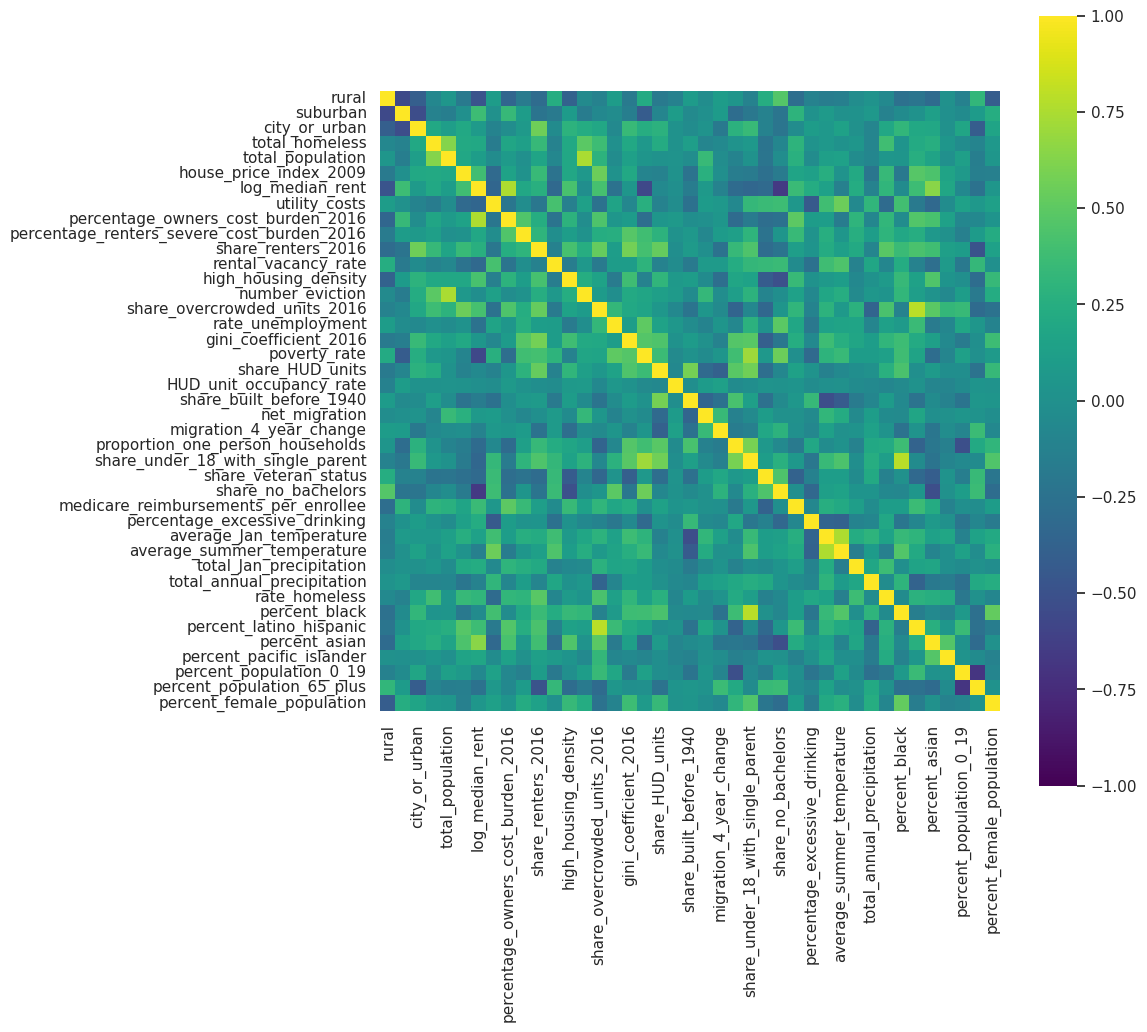

In [ ]:
corr_matrix = df.drop(columns = ['coc_number']).corr()

plt.figure(figsize = (10,10))

sns.heatmap(corr_matrix, vmax = 1, vmin = -1, square = True, cmap = 'viridis')

It is important to note that correlation does not imply causation. While certain columns may appear with darker colors in the heatmap, it does not necessarily mean that one variable causes the other. Correlation simply measures the statistical relationship between variables. Therefore, caution should be exercised when interpreting the heatmap, and further analysis is required to establish any causal relationships between the variables.

#### **Scaling**

Down below we will be scaling the Data fram for the predictors

In [ ]:
scaler = RobustScaler().fit(X)

In [ ]:
X = pd.DataFrame(data = scaler.transform(X), columns = X.columns.values, index = X.index)

#### **Fitting Model on Full Dataset**

In [ ]:
model = sm.OLS(Y, sm.add_constant(X)).fit()

In [ ]:
X.shape

(374, 38)

In [ ]:
y_prediction = model.predict(sm.add_constant(X))

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     12.44
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.18e-43
Time:                        19:38:57   Log-Likelihood:                -1394.3
No. Observations:                 374   AIC:                             2865.
Df Residuals:                     336   BIC:                             3014.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

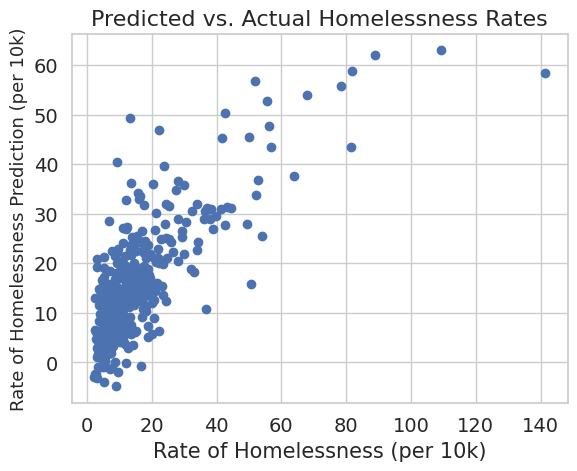

In [ ]:
plt.plot(df['rate_homeless'], y_prediction, 'o')

# Add axis labels
plt.xlabel('Rate of Homelessness (per 10k)', fontsize=15)
plt.ylabel('Rate of Homelessness Prediction (per 10k)', fontsize=13)
plt.title('Predicted vs. Actual Homelessness Rates', fontsize = 16)

# Increase the fontsize of the tick labels 
plt.tick_params(labelsize=14);

 We can see thatthere are too many variables in the model. We will use regularization methods and dimensionality reduction methods to build a model.

In [ ]:
y_pred_lr = model.predict(sm.add_constant(X))

In [ ]:
MSE = mean_squared_error(Y, y_pred_lr)
RMSE = np.sqrt(MSE)
R_squared = r2_score(Y, y_pred_lr)

print('MSE = ', MSE.round(3), 'RMSE = ', RMSE.round(3), 'R-squared = ', R_squared.round(3))

MSE =  101.345 RMSE =  10.067 R-squared =  0.578


In [ ]:
mean_absolute_error(Y, y_pred_lr)

6.730766949751333

#### **Fitting Models on the train dataset**

In [ ]:
scaler = RobustScaler().fit(x_train)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

####**Lasso Regression**

The code below is used to perform Lasso regression with different alpha values and visualize the change in coefficients as the regularization strength varies. 

In [ ]:
alphas = 10**np.linspace(-4,0,10)

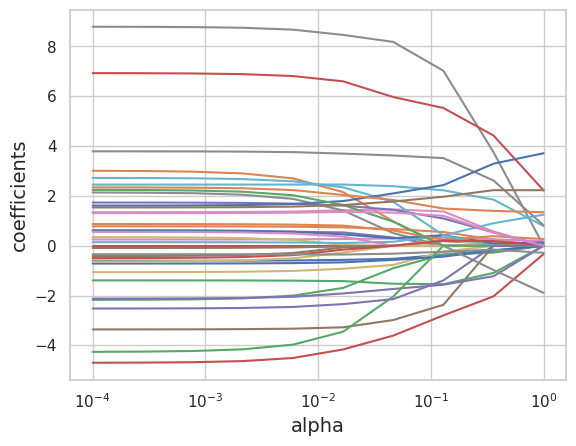

In [ ]:
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

In [ ]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)

In [ ]:
lassocv.fit(x_train, y_train)
lassocv.alpha_

0.8715344521488156

The value of 0.8715 indicates the specific alpha value that the Lasso model determined as optimal during the cross-validation process.

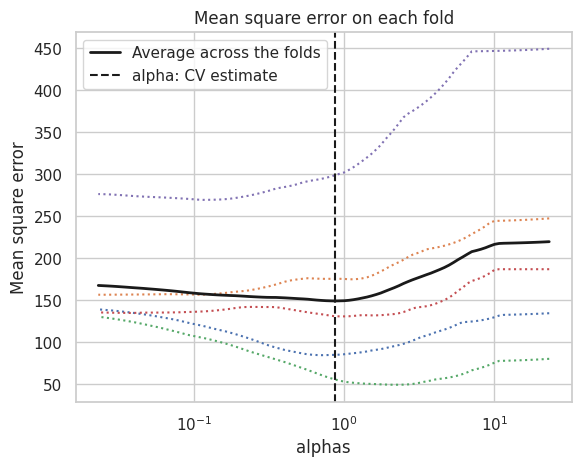

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, ":")
plt.plot(
    lassocv.alphas_ ,
    lassocv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassocv.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");

The code above helps visualize the MSE values across different alpha values and provides insights into the performance of the LassoCV model during cross-validation.

In [ ]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(x_train, y_train)

In [ ]:
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,12.40
HUD_unit_occupancy_rate,-0.00
average_Jan_temperature,-0.00
average_summer_temperature,-0.00
city_or_urban,0.00
gini_coefficient_2016,0.00
high_housing_density,-0.00
house_price_index_2009,0.00
log_median_rent,0.00
medicare_reimbursements_per_enrollee,-0.00


What this is explaining is that if the estimated coefficient for one of these intercepts is 2.24 then for every one-unit increase in that variable then the dependent varaible is estimated to increase by 2.24, assuming all other variables in the model remian constant. Additonally the (-) or (+) indicates the relationship between the predictor variable and the dependent variable.  A positive coefficient indicates a positive relationship, meaning an increase in the predictor variable is associated with an increase in the dependent variable. Conversely, a negative coefficient indicates a negative relationship, where an increase in the predictor variable is associated with a decrease in the dependent variable.

In [ ]:
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(x_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(x_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 164.997  RMSE = 12.845  R-squared = 0.528


MSE measures the avergae sqaured difference between the predicated values and the actual values in regression model. lower MSE value indicates better model performance, as it suggests that the predicted values are closer to the actual values. Like MSE, a lower RMSE value indicates better model performance. For our model it means that the predicted and actual values is is approximately 12.845 units off. R-squared values range from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variability in the response variable. In our case, the R-squared value of 0.528 suggests that approximately 52.8% of the variance in the dependent variable is explained by the independent variables in the model.

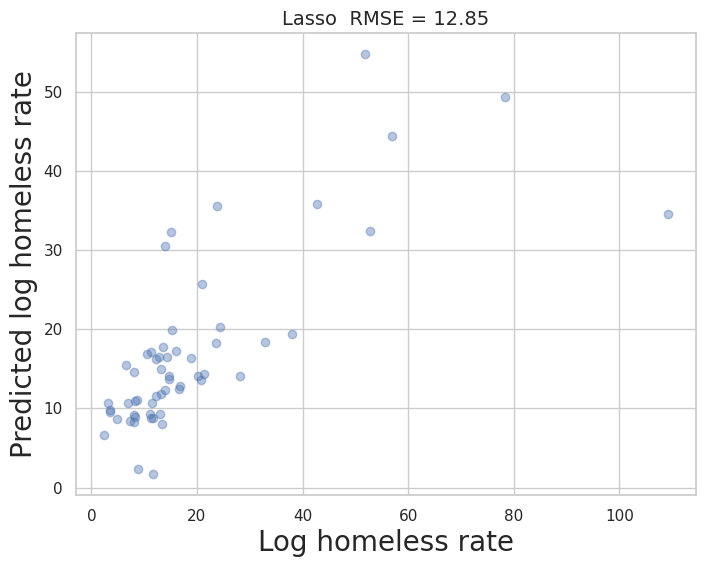

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(y_test, lasso_reg.predict(x_test),'o', alpha = 0.4)

plt.xlabel('Log homeless rate',fontsize = 20)
plt.ylabel('Predicted log homeless rate',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14);

#### **Ridge**

Similar to what we just completed ridge regression will focus on reducing the impact of multicollinearity while retaining all variables in the model. 

In [ ]:
alphas = 10**np.linspace(-3,5,20)

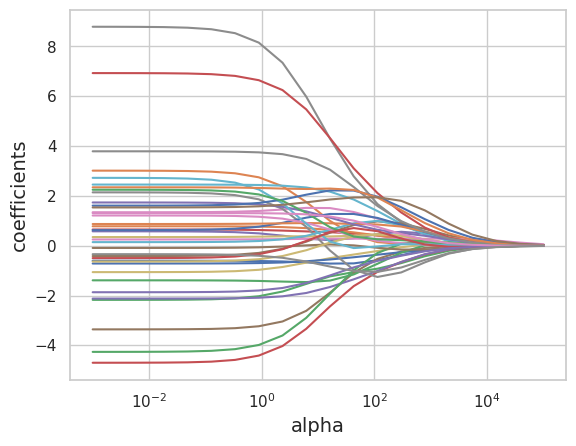

In [ ]:
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

In [ ]:
ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')

ridgecv.fit(x_train, y_train);

ridgecv object will contain the fitted Ridge model with the best alpha value determined through the cross-validation

In [ ]:
ridgecv.alpha_

112.88378916846884

The value given above represent the amount of  regularization applied to your Ridge regression model. 

In [ ]:
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(x_train, y_train)

In [ ]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,12.256
HUD_unit_occupancy_rate,-0.580
average_Jan_temperature,0.144
average_summer_temperature,-0.921
city_or_urban,0.410
gini_coefficient_2016,0.465
high_housing_density,-0.528
house_price_index_2009,1.094
log_median_rent,1.675
medicare_reimbursements_per_enrollee,-0.211


Similar to the Lasso, these coefficients indicate the relationship between each variable and the target variable in the Ridge regression model. They represent the change in the target variable for a one-unit change in the corresponding variable, assuming all other variables are held constant.

In [ ]:
MSE_ridge = mean_squared_error(y_test, ridge_reg.predict(x_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(x_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 160.66  RMSE = 12.675  R-squared = 0.54


Similar to Lasso, we are printing three evaluation metrics for the Ridge regression model. 

#### **XGBoost Method**

XGBoost (eXtreme Gradient Boosting). Is an implementation of gradient boosting, which is an ensemble learning method that combines multiple weak prediction models to create a stronger and more accurate predictive model.

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f456ac8f4c0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f456ac8cc10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f456ac8d570>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f456ac8dde0>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

Some key points from this is that the return_train_score: Determines whether to include the training scores in the output. By setting return_train_score=True, the results will include the training scores as well.

scoring: Specifies the scoring metric to be used for evaluation. In this case, 'neg_mean_squared_error' is used, which means the negative mean squared error will be used as the evaluation metric. The negative sign is used because RandomizedSearchCV tries to maximize the score, so using a negative value of MSE allows it to find the model with the smallest mean squared error.

In [ ]:
search.best_params_

{'colsample_bytree': 0.96197898386077,
 'gamma': 0.409198614620444,
 'learning_rate': 0.1096734642764698,
 'max_depth': 2,
 'n_estimators': 133,
 'subsample': 0.9339150836529718}

In [ ]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")

In [ ]:
model_xgb.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.96197898386077, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.409198614620444, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1096734642764698, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=133, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

The output above provides insights into the specific configuration, enabling us to understand how the model has been set up and if we want to or needed adjusting those hyperparameters. 

In [ ]:
# Fitting model on training data 
model_xgb = xgb.XGBRegressor()  
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Now we will predict the test data

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)

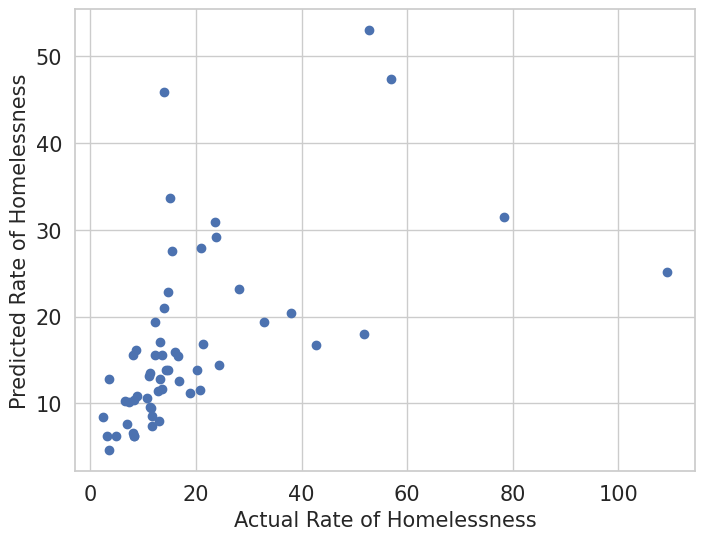

In [ ]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_xgb, 'o');

plt.xlabel('Actual Rate of Homelessness', fontsize = 15)
plt.ylabel('Predicted Rate of Homelessness', fontsize = 15)

plt.tick_params(labelsize = 15)

From the graph above we can see the predicted rate of homelessness vs actual, where it is not as dense

In [ ]:
# Computing the RMSE
mean_squared_error(y_test, y_pred_xgb, squared = False).round(3)
     

15.794

In [ ]:
# Computing the mean absolute error
mean_absolute_error(y_test, y_pred_xgb).round(3)

8.278

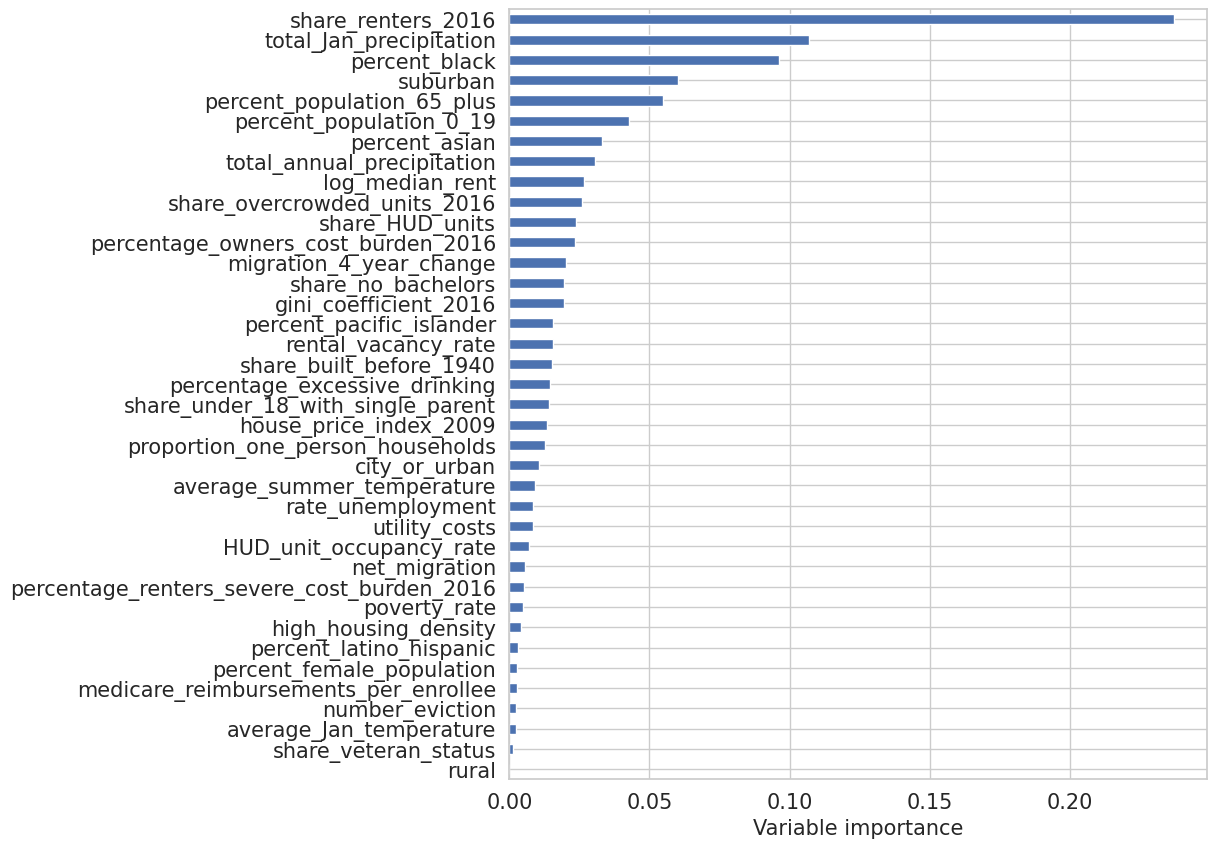

In [ ]:
# Plotting variable importances for the XGBoost model
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (9,10)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 15);
     

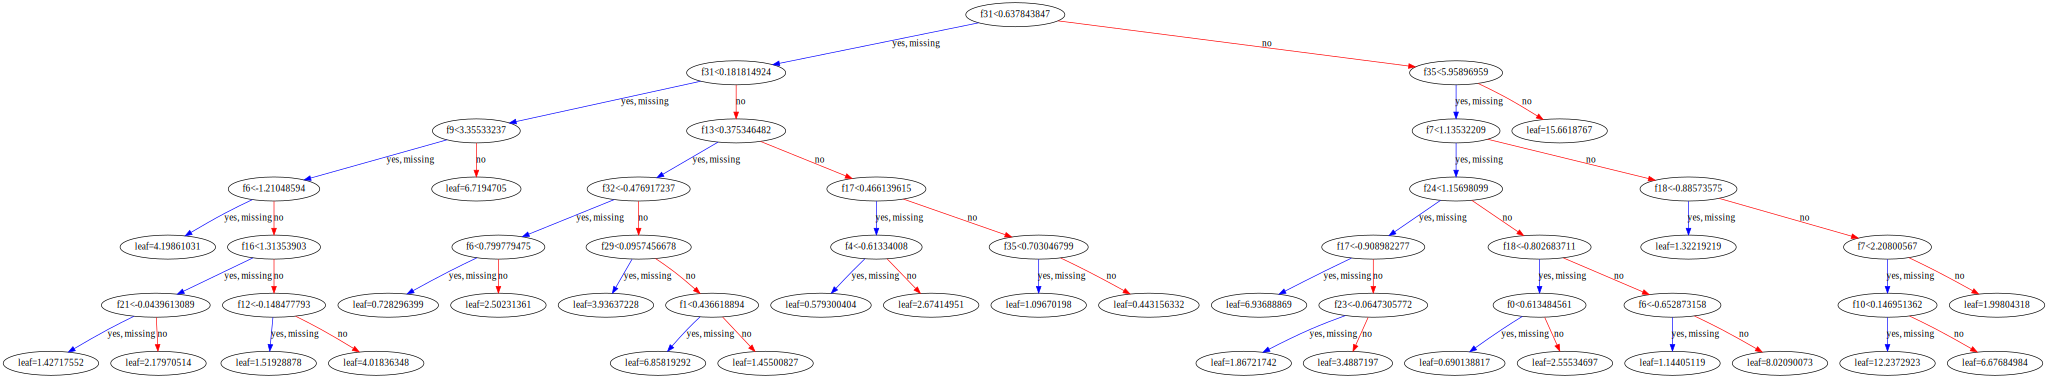

In [ ]:
xgb.to_graphviz(model_xgb, num_trees=1)

## **Additional Step**

For our additional We are investigating whether the density of different areas (such as major cities, suburban regions, and rural areas) has an impact on their respective rates of homelessness.

Following a similar approach as before, we will perform the same calculations for urban, suburban, and rural areas. However, this time we will focus solely on evaluating the root mean square error (RMSE) using the Lasso regression model.

####**Suburban**

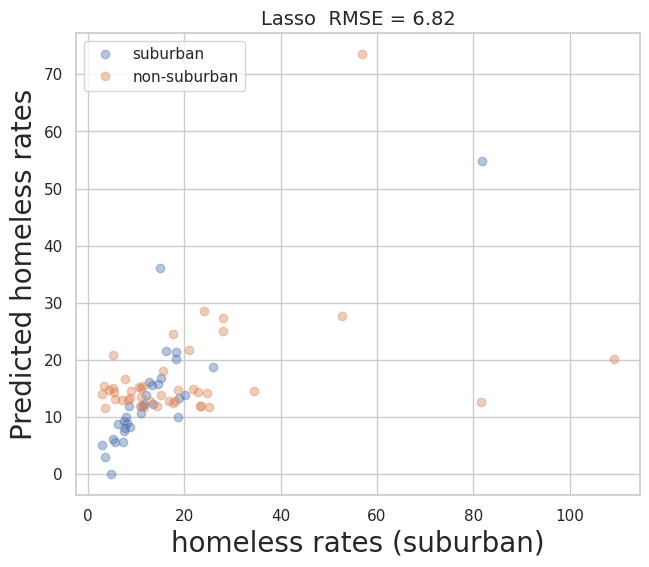

In [ ]:

X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 1]
y = df['rate_homeless'].loc[df['suburban'] == 1]

# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')


MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Initializing and fitting Lasso Regression method 
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

# Computing MSE, RMSE, and R^2 for Lasso model
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

plt.figure(figsize=(16,6))

# Plotting Lasso predictions 
plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "suburban")
plt.xlabel('homeless rates (suburban)',fontsize = 20)
plt.ylabel('Predicted homeless rates',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)


X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 0]
y = df['rate_homeless'].loc[df['suburban'] == 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))


plt.subplot(1,2,1) 
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "non-suburban")

plt.subplots_adjust(hspace = 0.5)

plt.legend(loc="upper left") 
plt.show()

The RMSE score provides a measure of how well the Lasso regression model fits the data, with lower values indicating better performance. This will allow us to assess the accuracy of the predictions made by the model and the different variations (urban & rural)

####**Urban**

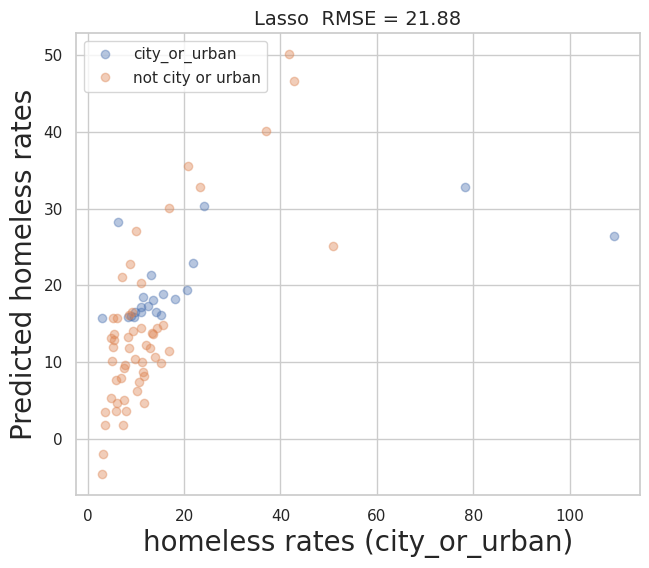

In [ ]:

X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['city_or_urban'] == 1]
y = df['rate_homeless'].loc[df['city_or_urban'] == 1]

# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')


MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Initializing and fitting Lasso Regression method 
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

# Computing MSE, RMSE, and R^2 for Lasso model
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

plt.figure(figsize=(16,6))

# Plotting Lasso predictions 
plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "city_or_urban")
plt.xlabel('homeless rates (city_or_urban)',fontsize = 20)
plt.ylabel('Predicted homeless rates',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)


X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['city_or_urban'] == 0]
y = df['rate_homeless'].loc[df['city_or_urban'] == 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))


plt.subplot(1,2,1) 
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "not city or urban")

plt.subplots_adjust(hspace = 0.5)

plt.legend(loc="upper left") 
plt.show()

#### **Rural**

Similar to the plots we made above we now are focusing on Rural 

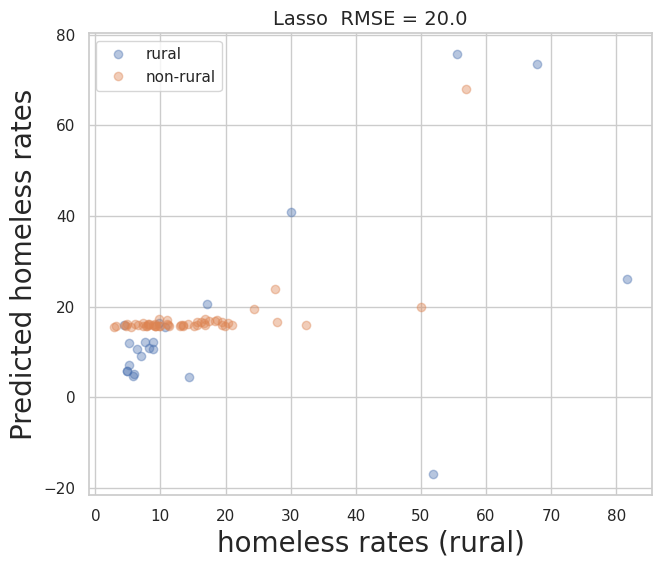

In [113]:

X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['rural'] == 1]
y = df['rate_homeless'].loc[df['rural'] == 1]

# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')


MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Initializing and fitting Lasso Regression method 
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

# Computing MSE, RMSE, and R^2 for Lasso model
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

plt.figure(figsize=(16,6))

# Plotting Lasso predictions 
plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "rural")
plt.xlabel('homeless rates (rural)',fontsize = 20)
plt.ylabel('Predicted homeless rates',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)


X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['rural'] == 0]
y = df['rate_homeless'].loc[df['rural'] == 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))


plt.subplot(1,2,1) 
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "non-rural")

plt.subplots_adjust(hspace = 0.5)

plt.legend(loc="upper left") 
plt.show()

## **Conclusion**

It was very interesting and helpful to use the regression models. The main purpose of using regression models like Ridge and Lasso is to handle the problem of overfitting and improve the generalization ability of the model. Both Ridge and Lasso regression are regularization techniques that add a penalty term to the regression objective function, which helps control the complexity of the model and prevent overfitting. while XGBoost is a boosting approach that can be used to both regression and classification tasks.

It was intriguing to compare the Lasso models for suburban, rural, and urban areas as part of my additional step. A low RMSE indicates that the model's predictions are close to the true values, indicating a smaller overall prediction error. This implies that the model has a better ability to capture the underlying patterns and relationships in the data. In contrast, a high RMSE signifies larger prediction errors and suggests that the model's performance is poorer in terms of accurately predicting the target variable

Among the three models, the suburban Lasso model yielded the lowest RMSE of 6.28, while the urban and rural models had higher RMSE values, ranging from 20 to 22. In future analyses, it would be interesting to include a Ridge model and examine its performance. By comparing the Ridge plot and evaluating the resulting error, we can assess whether the Ridge model achieves a smaller error compared to the Lasso models.